In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [17]:
path = "./CV_Server/" #CV_Anserini_TasB_2023-05-06_11-01-45_0Li"

mrr_best = []
nfairr_best = []
mrr_last = []
nfairr_last = []
bias_regul_coeff = []
df_res = pd.DataFrame()

best_step_l = []

#take the last step instead of best

for dir in os.listdir(path):
    df = pd.read_excel(os.path.join(path,dir, "metrics_CV_Anserini_TasB.xls"), sheet_name="metrics")

    min_loss = df["loss"].iloc[2:].min()
    best_step = df["global_step"][df["loss"]==min_loss].iloc[0]
    best_step_l.append(best_step)

    mrr_best.append(df["MRR@10"][df["global_step"]==best_step].iloc[0])
    nfairr_best.append(df["NFaiRR_cutoff_10"][df["global_step"]==best_step].iloc[0])
    mrr_last.append(df["MRR@10"].iloc[-1])
    nfairr_last.append(df["NFaiRR_cutoff_10"].iloc[-1])
    df_conf = pd.read_json(os.path.join(path,dir, "configuration.json"))
    bias_regul_coeff.append(df_conf["bias_regul_coeff"].iloc[0])


df_res["mrr_best"] = mrr_best
df_res["mrr_last"] = mrr_last
df_res["nfairr_best"] = nfairr_best
df_res["nfairr_last"] = nfairr_last
df_res["bias_regul_coeff"] = bias_regul_coeff
df_res["best_step"] = best_step_l

#df.plot(x = "global_step", y = "NFaiRR_cutoff_10")

In [18]:
df_res = df_res.sort_values(by = "bias_regul_coeff")
df_res

,mrr_best,mrr_last,nfairr_best,nfairr_last,bias_regul_coeff,best_step
0,0.378365,0.377693,0.903976,0.904745,0,30000
5,0.375154,0.375196,0.915023,0.914128,1,78000
3,0.366745,0.366796,0.919431,0.920690,2,78000
2,0.338240,0.336700,0.943774,0.945263,5,78000
1,0.278681,0.276924,0.955791,0.954071,10,78000
4,0.220967,0.217875,0.966369,0.967369,15,78000
6,0.169680,0.168689,0.972192,0.972107,20,78000


Text(0, 0.5, 'mrr_last')

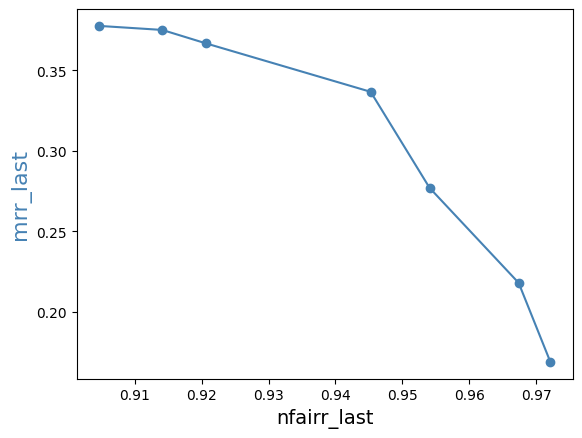

In [19]:
#define colors to use
col1 = 'steelblue'
col2 = 'red'

#define subplots
fig,ax = plt.subplots()
#add first line to plot
ax.plot(df_res["nfairr_last"], df_res['mrr_last'], color=col1, marker = "o")
#add x-axis label
ax.set_xlabel('nfairr_last', fontsize=14)
#add y-axis label
ax.set_ylabel('mrr_last', color=col1, fontsize=16)

Text(0, 0.5, 'nfairr_last')

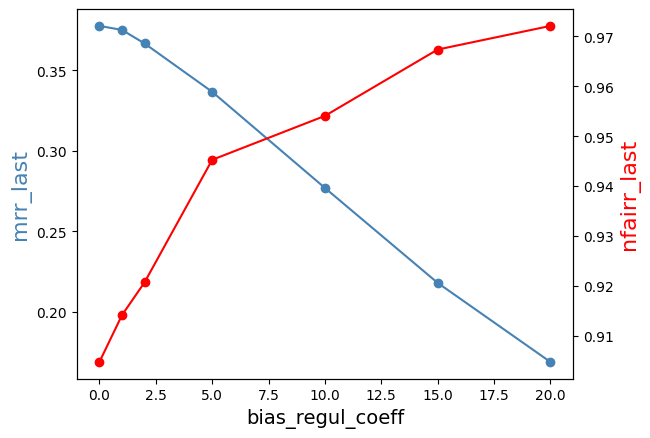

In [20]:
#define colors to use
col1 = 'steelblue'
col2 = 'red'

#define subplots
fig,ax = plt.subplots()
#add first line to plot
ax.plot(df_res["bias_regul_coeff"], df_res['mrr_last'], color=col1, marker = "o")
#add x-axis label
ax.set_xlabel('bias_regul_coeff', fontsize=14)
#add y-axis label
ax.set_ylabel('mrr_last', color=col1, fontsize=16)
#define second y-axis that shares x-axis with current plot
ax2 = ax.twinx()
#add second line to plot
ax2.plot(df_res["bias_regul_coeff"], df_res['nfairr_last'], color=col2, marker = "o")

#add second y-axis label
ax2.set_ylabel('nfairr_last', color=col2, fontsize=16)

Text(0, 0.5, 'nfairr_best')

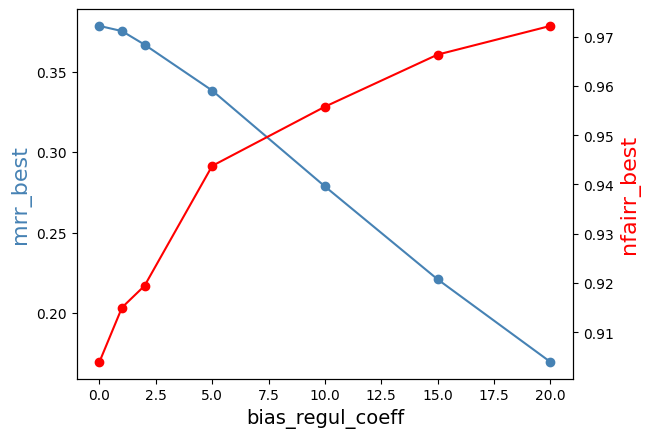

In [10]:
#define colors to use
col1 = 'steelblue'
col2 = 'red'

#define subplots
fig,ax = plt.subplots()
#add first line to plot
ax.plot(df_res["bias_regul_coeff"], df_res['mrr_best'], color=col1, marker = "o")
#add x-axis label
ax.set_xlabel('bias_regul_coeff', fontsize=14)
#add y-axis label
ax.set_ylabel('mrr_best', color=col1, fontsize=16)
#define second y-axis that shares x-axis with current plot
ax2 = ax.twinx()
#add second line to plot
ax2.plot(df_res["bias_regul_coeff"], df_res['nfairr_best'], color=col2, marker = "o")

#add second y-axis label
ax2.set_ylabel('nfairr_best', color=col2, fontsize=16)

In [15]:
# sns.set_theme(style="darkgrid")
# sns.lineplot(data =df_res, x = "bias_regul_coeff", y="mrr_best", marker="o", color='r')
# ax2 = plt.twinx()
# sns.lineplot(data =df_res, x = "bias_regul_coeff", y="nfairr_best", marker="o", ax=ax2)